In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

In [105]:
7*24*12, 30*24*12, 24*12

(2016, 8640, 288)

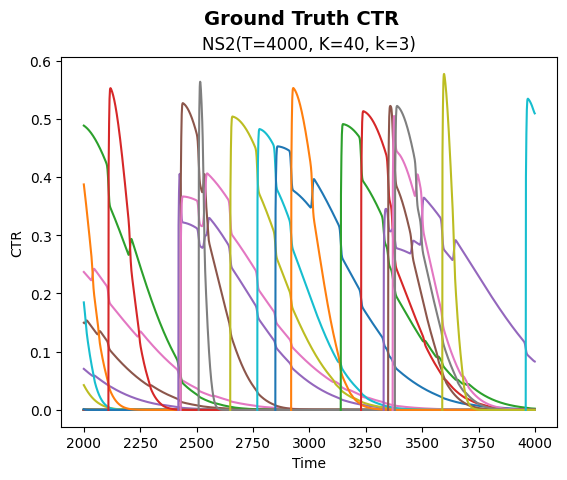

In [84]:
setting_config = {
    "item_count": 40,
    "k": 3,
    "episode_count": 4000,
    "lifetime": 2000,
    "smoothing": 200,
    "falloff_rate": 0.15,
    "ctr_base": 0.5,
    "rank_factor": 0.5,
    "falloff_popularity_factor": 0.8
}

s = NewsSimulationSetting2(**setting_config)
s.visualize(tmin=2000)

In [56]:
sim = Simulator(setting=s, run_count=50, seed_change_interval=5)

sim.run_oracle()
sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': 0.1, 'q0': 1})
sim.run_agent(ThompsonAgent, {})
sim.run_agent(ThompsonAgent, {'ws': 1500})
sim.run_agent(FroomleAgent, {'boost_denominator':500, 'boost_rank':2})
sim.run_agent(FroomleAgent, {'boost_denominator':100, 'boost_rank':2, 'ws':1500})

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

 NS2(T=4300, K=200, k=3) 
     950.4 ±13.3       - EG(eps=0.1, lr=0.1, q0=1)
     956.9 ±52.8       - FR(d=500, r=2)
    1782.1 ±14.9       - TS()
    1961.2 ±73.8       - SW-FR(d=100, r=2, ws=1500)
    2203.2 ±17.1       - SW-TS(ws=1500)



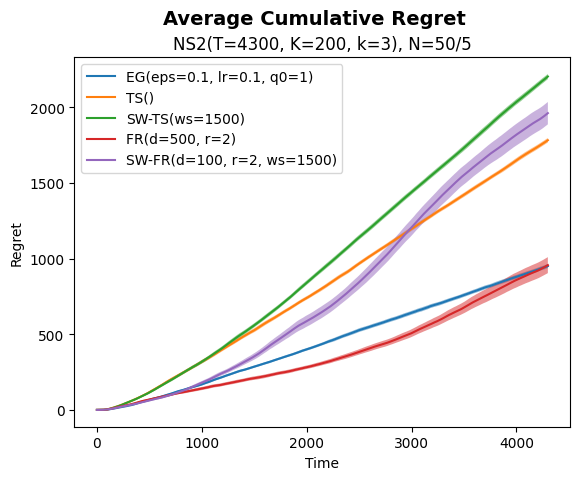

In [59]:
sim.results.rank()
sim.results.create_regret_plot()

 NS2(T=4300, K=200, k=3) 
     308.6 ±7.3        - EG(eps=0.1, lr=0.1, q0=1)
     449.7 ±51.2       - FR(d=500, r=2)
     586.0 ±11.4       - TS()
     755.4 ±65.1       - SW-FR(d=100, r=2, ws=1500)
     765.0 ±7.7        - SW-TS(ws=1500)



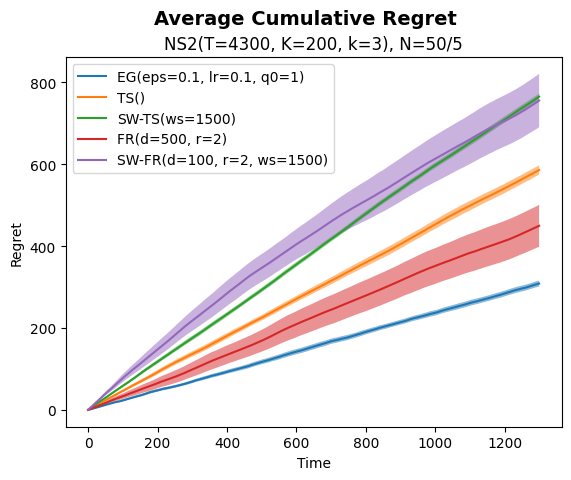

In [70]:
sim.results.rank(t_range=(3000, 4300))
sim.results.create_regret_plot(t_range=(3000, 4300))

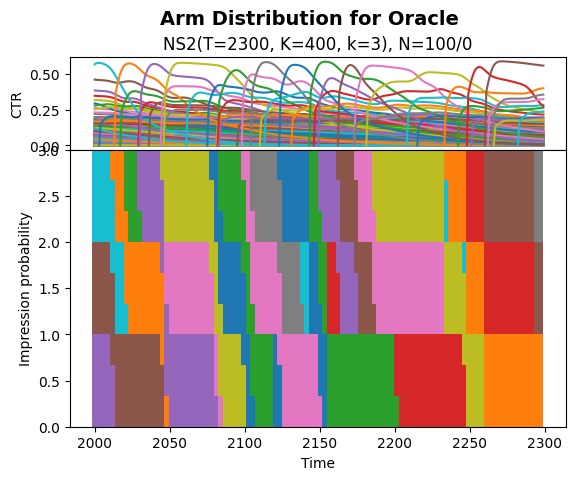

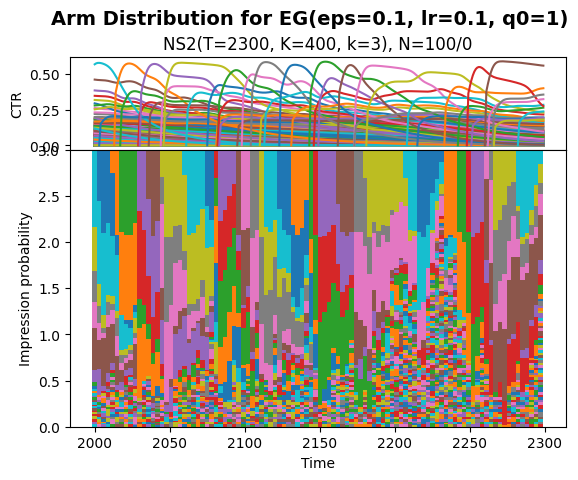

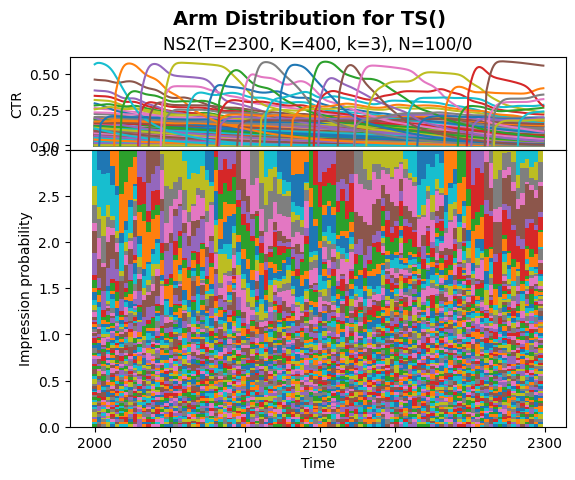

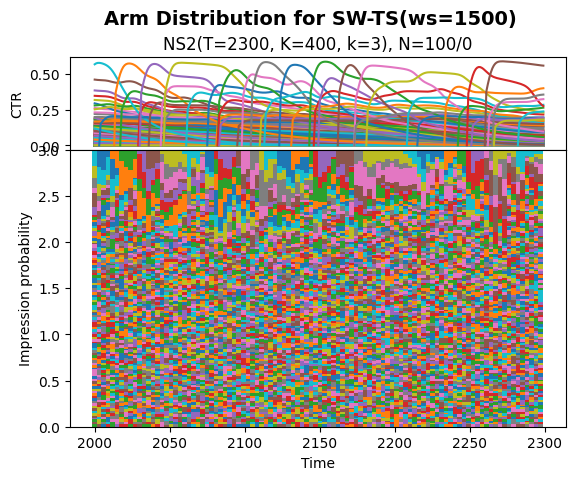

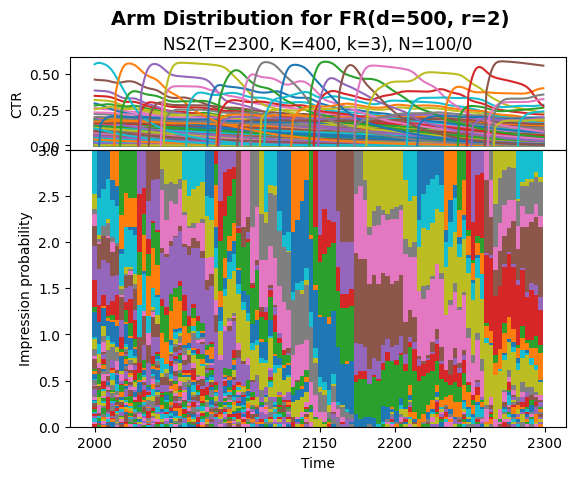

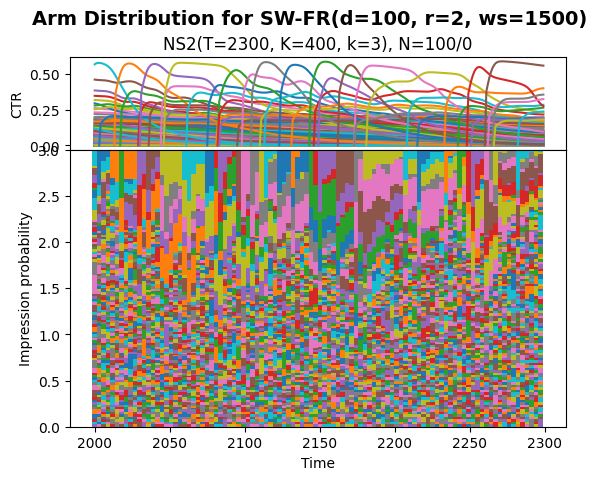

In [26]:
sim.results.create_impressions_plot(t_range=(2000, 2300))

# Thompson Sampling

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 NS2(T=5000, K=50, k=3) 
     904.9 ±62.3       - SW-TS(ws=3000)
     963.0 ±63.4       - TS()
    1163.2 ±70.4       - SW-TS(ws=1000)
    1560.5 ±79.6       - SW-TS(ws=500)
    2586.9 ±89.5       - SW-TS(ws=100)



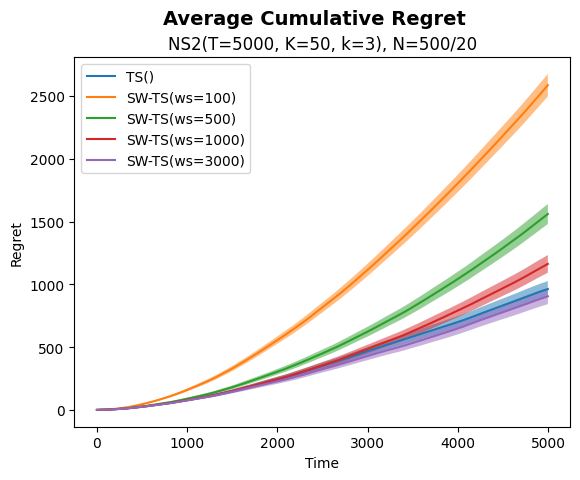

In [16]:
sim_TS = Simulator(s, run_count=500, seed_change_interval=20)
sim_TS.run_oracle()

sim_TS.run_agent(ThompsonAgent, {})
for ws in [100, 500, 1000, 3000]:
    for prior in [None]:
        sim_TS.run_agent(ThompsonAgent, {'ws': ws, 'prior': prior})
    
sim_TS.results.rank()
sim_TS.results.create_regret_plot()

# Froomle

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 NS2(T=5000, K=50, k=3) 
     655.2 ±50.0       - FR(d=500, r=2)
     669.0 ±49.7       - FR(d=500, r=1)
     701.5 ±51.0       - FR(d=1000, r=1)
     702.8 ±53.0       - FR(d=100, r=1)
     708.7 ±52.1       - FR(d=1000, r=2)
     842.5 ±60.3       - FR(d=100, r=2)
    1011.5 ±63.0       - FR(d=500, r=3)
    1127.1 ±68.7       - FR(d=100, r=3)
    1182.6 ±68.4       - FR(d=1000, r=3)



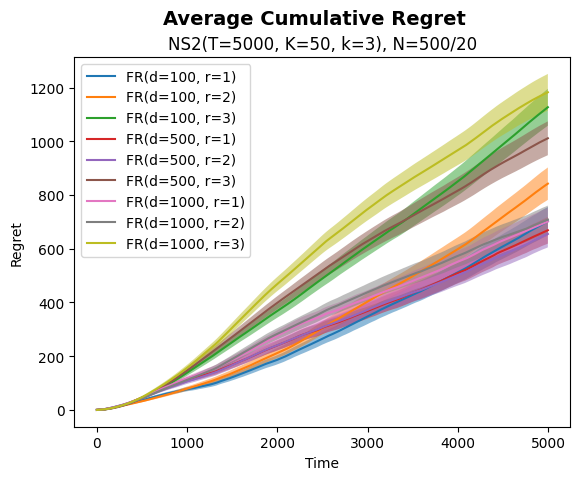

In [17]:
sim_FR = Simulator(s, run_count=500, seed_change_interval=20)
sim_FR.run_oracle()

for b in [100, 500, 1000]:
    for r in [1, 2, 3]:
        sim_FR.run_agent(FroomleAgent, {'boost_denominator': b, 'boost_rank': r})
    
sim_FR.results.rank()
sim_FR.results.create_regret_plot()

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 NS2(T=5000, K=50, k=3) 
     612.4 ±49.9       - SW-FR(d=500, r=2, ws=3000)
     653.8 ±50.1       - SW-FR(d=500, r=2, ws=10000)
     654.0 ±50.2       - SW-FR(d=1000, r=2, ws=3000)
     696.5 ±54.1       - SW-FR(d=100, r=2, ws=3000)
     701.2 ±52.0       - SW-FR(d=500, r=2, ws=1000)
     701.5 ±51.4       - SW-FR(d=1000, r=2, ws=10000)
     774.5 ±56.4       - SW-FR(d=100, r=2, ws=1000)
     776.4 ±53.1       - SW-FR(d=1000, r=2, ws=1000)
     821.0 ±58.9       - SW-FR(d=100, r=2, ws=10000)



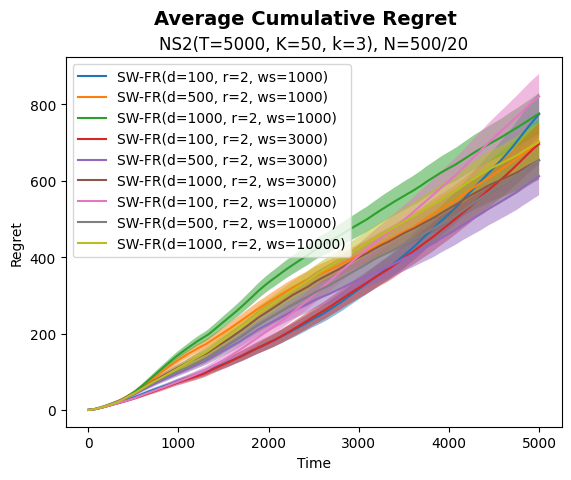

In [18]:
sim_SWFR = Simulator(s, run_count=500, seed_change_interval=20)
sim_SWFR.run_oracle()

for ws in [1000, 3000, 10000]:
    for b in [100, 500, 1000]:
        for r in [2]:
            sim_SWFR.run_agent(FroomleAgent, {'boost_denominator': b, 'boost_rank': r, 'ws': ws})
    
sim_SWFR.results.rank()
sim_SWFR.results.create_regret_plot()